# Breast Cancer Subtyping with Genomics

## Molecular biology

### Proteins
<img src="https://www.eufic.org/images/uploads/whats-in-food/protein-functions.png">

### Many new exciting advances in science let us investigate on the molecular level
<img src="https://www.news-medical.net/image.axd?picture=2019%2F5%2Fshutterstock_1040732464.jpg">

## Cancer in the US

<img src="http://cdn.statcdn.com/Infographic/images/normal/20692.jpeg">

## Large scale genomic datasets

We will examine a breast cancer dataset today. It contains a little more than 2,000 patients and expression (abundance) level data from approximately 20,000 genes. Each of the patients is labeled as one of six subtypes. 

Different subtypes react differently to the various treatments available. Knowing a patients subtype is therefore a critical step. Understanding the moelcular signature of a subtype is important for generating new ideas and new treatment options. 

## Exploratory Data Analysis

This first dataset shows the abundance of transcripts for three genes: ESR1, AURKA, ERBB2, and the subtype of breast cancer.

### Read in the data

In [1]:
import pandas as pd
df = pd.read_csv(
    "https://raw.githubusercontent.com/pauleanderson/data-science-training-workshop-3/main/data/breast_cancer_three_gene.csv",
    index_col=0
)
df

,ESR1,AURKA,ERBB2,Subtype
0,0.804501,0.264356,6.941677,LumA
1,0.163597,0.589052,6.551394,Basal
2,0.569347,0.189531,7.056530,LumA
3,0.847584,0.264849,7.028625,LumB
4,0.442474,0.526040,8.783604,LumB
...,...,...,...,...
2128,0.635455,0.143977,7.159443,LumA
2129,0.632849,0.258203,7.145417,LumA
2130,0.662344,0.243027,6.936228,LumA
2131,0.086119,0.479997,7.671082,HER2+


**Distribution of subtypes**

In [2]:
df['Subtype'].value_counts()

LumA           721
LumB           491
Basal          330
HER2+          239
Normal Like    202
Normal         150
Name: Subtype, dtype: int64

**Exercise 1.** Create a bar plot visualizing the prevelance of subtypes in the dataset.

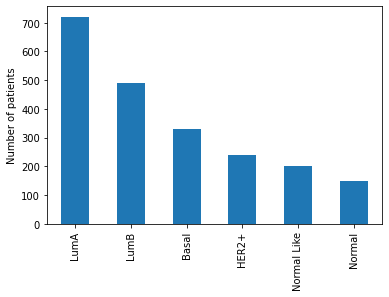

In [3]:
# Your solution here

**Exercise 2.** Create the same bar chart but with normalized values (i.e., fractional values)

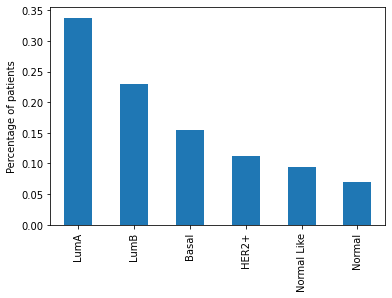

In [4]:
# Your solution here

Let's examine the gene expression values of the first patient.

In [5]:
df.loc[0]

ESR1       0.804501
AURKA      0.264356
ERBB2      6.941677
Subtype        LumA
Name: 0, dtype: object

This patient was diagnosed with subtype Luminal-A. Different subtypes react differently to the various treatments available. Knowing the diagnosis is therefore a critical step.

Let's examine the gene expression values themselves.

In [6]:
df.describe()

,ESR1,AURKA,ERBB2
count,2133.000000,2133.000000,2133.000000
mean,0.535424,0.317596,7.185408
std,0.260877,0.150286,0.519532
min,0.000000,0.000000,5.697302
25%,0.334803,0.207093,6.899016
50%,0.604382,0.306186,7.100927
75%,0.743680,0.421009,7.317463
max,1.000000,1.000000,9.197101


**Problem 1:** Do you notice anything different about one of the genes? Can you characterize what is different and suggest why it may be a problem depending on the analysis?

Type your solution here

## Our first classifier

**Exercise 3.** Develop a classifier and/or pipeline using these three genes and the labels available in y.

In [7]:
X = df[['ESR1','AURKA','ERBB2']]
y = df['Subtype']

from sklearn.neighbors import KNeighborsClassifier

# Your solution here

classifier.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

### Training Accuracy

In [8]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X)
accuracy_score(y,y_pred)

0.776840131270511

### Training Accuracy Pitfalls
Training accuracy can be misleading. It is an accuracy score based on data that has already been seen. It is much more interesting to see how a model will perform on data it has not seen perform. For this, we need to split our data into training and testing data. Train on the training data and predict/evaluate on the testing data.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Your solution here

classifier.fit(X_train,y_train);

In [10]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.6463068181818182

That's a greater than 10 point drop! Always make sure you evaluate on test data and be careful drawing conclusions about how your model will perform in the future.

**Problem 2.** Does scaling improve our classifier?

Examine the code below and type your answer here.

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns,index=X.index)
X_scaled.describe()

,ESR1,AURKA,ERBB2
count,2133.000000,2133.000000,2133.000000
mean,0.535424,0.317596,0.425198
std,0.260877,0.150286,0.148446
min,0.000000,0.000000,0.000000
25%,0.334803,0.207093,0.343367
50%,0.604382,0.306186,0.401059
75%,0.743680,0.421009,0.462930
max,1.000000,1.000000,1.000000


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# Your solution here

classifier.fit(X_train,y_train);

In [14]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.6434659090909091

## Using our classifier to perdict the subtype of a single patient

In [15]:
#@title Choose new values for a patient (double click to hide/show code)
#@markdown **Important:** You must move the slider and then press the play button

#@markdown Experiment with the values and observe how the prediction changes

from IPython.display import display, Markdown, Latex

ESR1 = 0.2 #@param {type:"slider", min:0, max:1, step:0.1}

AURKA = 0.1 #@param {type:"slider", min:0, max:1, step:0.1}

ERBB2 = 6 #@param {type:"slider", min:5, max:10, step:0.5}

new_patient = pd.Series([ESR1,AURKA,ERBB2],index=["ESR1","AURKA","ERBB2"])
print("This patient would be predicted to be:",classifier.predict([new_patient])[0])

This patient would be predicted to be: HER2+


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


**Problem 3.** What are some of your most pressing computational/algorithmic/data questions?

**Your answers here**

In [16]:
#@title Let's look at a classification report (double click for code)

#@markdown Some documentation: https://en.wikipedia.org/wiki/Precision_and_recall

from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Basal       0.78      0.82      0.80       112
       HER2+       0.55      0.65      0.60        71
        LumA       0.66      0.73      0.69       246
        LumB       0.61      0.55      0.58       166
      Normal       0.79      0.68      0.73        50
 Normal Like       0.26      0.15      0.19        59

    accuracy                           0.64       704
   macro avg       0.61      0.60      0.60       704
weighted avg       0.63      0.64      0.63       704



**Problem 4:** What subtypes does our model perform the best when trying to predict? What subtypes do we perform the worst when trying to predict? 

**Your answers here**

In [17]:
#@title Double click for answers

# If we are considering precision, our model performs the best on the Basal
# subtype. On the other side, our model has the worst precision on Normal
# Like. The same pattern holds true for recall.

# The f1-score is a combination of precision and recall (harmonic mean).
# The support is the number of patients for each subtype.

**Problem 5:** What are some of the next steps you might take with this dataset? What is a priority to you?

**Your answers here**

In [18]:
#@title Double click for some answers

# We could try other modeling techniques to see if we could improve the 
# performance. 

# We could focus our efforts on a more balanced method that performs
# more equally on all subtypes.

# We could incorporate other pieces of information.

# We could focus on visualizations.

# We could read the literature about breast cancer genomics.

# As you can see above, we need a wide variety of fields to study
# something as complex as cancer.


## Full dataset

In [19]:
!gdown 102fpQRRYnAycggsBV8fZYwEOG01cbKri -O /tmp/full.csv.gz

Downloading...
From: https://drive.google.com/uc?id=102fpQRRYnAycggsBV8fZYwEOG01cbKri
To: /tmp/full.csv.gz
100% 357M/357M [00:02<00:00, 158MB/s]


In [20]:
X = pd.read_csv("/tmp/full.csv.gz",index_col=0)
X.head()

,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Sample ID,,,,,,,,,,,,,,,,,,,,,
MB-0362,0.121975,0.215056,0.137268,0.319299,0.299318,0.379480,0.412660,0.361855,0.101269,0.172184,...,0.221594,0.299784,0.362357,0.225769,0.367554,0.132938,0.328175,0.573906,0.539070,0.147249
MB-0346,0.192559,0.042307,0.204485,0.103171,0.315292,0.391824,0.544226,0.372350,0.087123,0.164404,...,0.156303,0.516268,0.489675,0.363120,0.457905,0.155936,0.121523,0.483270,0.411438,0.224434
MB-0386,0.129016,0.302035,0.104212,0.478857,0.307694,0.265761,0.191160,0.214396,0.124491,0.135946,...,0.167134,0.210737,0.420390,0.164456,0.268026,0.169930,0.358189,0.616131,0.515510,0.124535
MB-0574,0.186569,0.204583,0.084922,0.155657,0.259502,0.225779,0.276242,0.363504,0.156255,0.174428,...,0.177223,0.211609,0.669651,0.530200,0.548744,0.054719,0.364991,0.480279,0.564949,0.158037
MB-0185,0.110777,0.337835,0.133802,0.265908,0.555257,0.349347,0.222268,0.381949,0.058114,0.111793,...,0.382424,0.450318,0.644640,0.280082,0.305045,0.135671,0.259829,0.531486,0.503557,0.165486


In [21]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns,index=X.index)
X_scaled.describe()

,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,...,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000
mean,0.129345,0.446733,0.140997,0.352773,0.428180,0.280144,0.268360,0.356326,0.144389,0.124940,...,0.247637,0.245608,0.445866,0.290930,0.391571,0.148065,0.447945,0.587342,0.594573,0.317150
std,0.050340,0.143844,0.116590,0.135176,0.122847,0.095390,0.112346,0.117847,0.079359,0.043501,...,0.101149,0.107474,0.111506,0.108836,0.124234,0.051582,0.159754,0.111545,0.128808,0.098199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100978,0.346920,0.088275,0.255381,0.344077,0.217556,0.197237,0.274489,0.106548,0.098976,...,0.177235,0.169188,0.375135,0.219624,0.305208,0.116703,0.335848,0.510695,0.512064,0.254998
50%,0.124106,0.450870,0.107185,0.338017,0.427113,0.271681,0.259785,0.350718,0.129315,0.122647,...,0.237368,0.241310,0.438770,0.279557,0.385738,0.144746,0.435556,0.587802,0.598981,0.310345
75%,0.149492,0.544661,0.134952,0.441670,0.501768,0.333748,0.323790,0.422431,0.158657,0.146547,...,0.305508,0.315312,0.513549,0.350253,0.468234,0.177225,0.541650,0.659314,0.678861,0.372176
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
!gdown 1rwEfgzhQjeR7YpQYil4A1dmTxlKbpaB5 -O /tmp/y.csv

Downloading...
From: https://drive.google.com/uc?id=1rwEfgzhQjeR7YpQYil4A1dmTxlKbpaB5
To: /tmp/y.csv
100% 33.6k/33.6k [00:00<00:00, 28.1MB/s]


In [23]:
y = pd.read_csv('/tmp/y.csv').set_index('Sample ID')['Pam50 + Claudin-low subtype']
y

Sample ID
MB-0000      claudin-low
MB-0002             LumA
MB-0005             LumB
MB-0006             LumB
MB-0008             LumB
                ...     
MTS-T2428            NaN
MTS-T2429            NaN
MTS-T2430            NaN
MTS-T2431            NaN
MTS-T2432            NaN
Name: Pam50 + Claudin-low subtype, Length: 2509, dtype: object

In [28]:
y = y.dropna()
X_scaled = X.loc[y.index]
X_scaled = X_scaled.dropna()
y = y.loc[X_scaled.index]
y = y.loc[y != 'NC']
X_scaled = X_scaled.loc[y.index]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# Your solution here

classifier.fit(X_train,y_train);

In [30]:
#@title Let's look at a classification report (double click for code)

#@markdown Some documentation: https://en.wikipedia.org/wiki/Precision_and_recall

from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Basal       0.53      0.74      0.61        53
        Her2       0.60      0.38      0.46        80
        LumA       0.59      0.90      0.71       239
        LumB       0.75      0.26      0.39       157
      Normal       0.58      0.48      0.53        54
 claudin-low       0.74      0.73      0.73        66

    accuracy                           0.61       649
   macro avg       0.63      0.58      0.57       649
weighted avg       0.64      0.61      0.58       649



**Did the accuracy go up or down? Why do you think that is?**

Your answer here.

## Would running this through a neural network improve our results?

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.metrics import precision_score, f1_score, recall_score
import numpy as np
import pandas as pd

class Encoder(Model):
    def __init__(self, shape):
        self.__num_hidden_layers = len(shape) - 2
        super(Encoder, self).__init__()
        layer_list = [layers.Flatten()]
        for shp in shape[1]:
            layer_list.append(layers.Dense(shp, activation='sigmoid'))
        self.encoder = tf.keras.Sequential(layer_list)
        self.decoder = tf.keras.Sequential([layers.Dense(shape[2], activation='sigmoid')])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
    def call_encoded(self,x):
        return self.encoder(x)

class DataSet(object):
  def __init__(self, data, labels):

    self._num_examples = labels.shape[0]

    self._data = data
    self._labels = labels
    self._epochs_completed = 0
    self._index_in_epoch = 0
    self._A = None

  @property
  def data(self):
    return self._data

  @property
  def labels(self):
    return self._labels

  @property
  def A(self):
    return self._A

  @A.setter
  def A(self,A):
    self._A = A

  @property
  def num_examples(self):
    return self._num_examples
  @property
  def start_index(self):
      return self._index_in_epoch
  @labels.setter
  def labels(self,values):
    self._labels = values


  def next_batch(self, batch_size, UNSUPERVISED = False):
    """Return the next `batch_size` examples from this data set."""
    n_sample = self.num_examples
    start = self._index_in_epoch
    end = self._index_in_epoch + batch_size
    end = min(end, n_sample)
    id = range(start, end)
    data_input = self._data[id, :]
    if ~UNSUPERVISED:
        target_input = self._labels[id, :]
    else: target_input = []

    self._index_in_epoch = end

    if end == n_sample:
        self._index_in_epoch = 0

    return data_input, target_input

class Data:
  def __init__(self,X,y):
    num_to_targets = pd.Series(y.unique())
    self.num_to_targets = num_to_targets
    n_label = len(num_to_targets)
    n_sample = len(X)
    Y = np.zeros([n_sample, n_label])
    for i,target in enumerate(num_to_targets):
        id = (y == target).values.nonzero()[0]
        Y[id, i] = 1
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    self.train = DataSet(X_train.values,Y_train)
    self.test = DataSet(X_test.values,Y_test)

def accuracy(labels,logits):
    #indices, labels = extract_index(ind_labels)
    y_pred = tf.argmax(input=logits, axis=1)
    y_true = tf.argmax(input=labels, axis=1)
    return accuracy_score(y_pred,y_true)

def custom_loss(labels_true,logits_est):
  loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
  return loss(labels_true,logits_est+1e-16)

def evaluation(logits, labels,map_dict):    
    print("Report:")
    y_pred = pd.Series(tf.argmax(input=logits, axis=1)).map(map_dict)
    y_true = pd.Series(tf.argmax(input=labels, axis=1)).map(map_dict)
    print(classification_report(y_true,y_pred))

def test_metrics(y_pred, y_test):
    print("~~~test metrics~~~")
    acc_test = evaluation(y_pred,y_test)
    return acc_test, y_pred

data = Data(X_scaled,y)

ae_shape = [data.train.data.shape[1], [1024, 512], data.train.labels.shape[1]] #data.train.data
print('/////////////////////////////:ae_shape',ae_shape)
ae = Encoder(ae_shape)
ae.compile(loss=custom_loss,optimizer='adam',metrics=accuracy,run_eagerly=True)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = ae.fit(data.train.data, data.train.labels, batch_size=256,epochs=2000,validation_split=0.1,verbose=True,callbacks=[callback])
print(ae.summary())
y_pred = ae.call(data.test.data)
evaluation(y_pred, data.test.labels,dict(data.num_to_targets))




/////////////////////////////:ae_shape [19083, [1024, 512], 6]
Epoch 1/2000
5/5 [==============================] - 3s 524ms/step - loss: 1.6628 - accuracy: 0.3528 - val_loss: 1.7317 - val_accuracy: 0.2803
Epoch 2/2000
5/5 [==============================] - 2s 475ms/step - loss: 1.6429 - accuracy: 0.3551 - val_loss: 1.7223 - val_accuracy: 0.2803
Epoch 3/2000
